In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/fire-detection-master/Datasets 1-2/Training"

training_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip=True,rotation_range=30,height_shift_range=0.2,fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/fire-detection-master/Datasets 1-2/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size=(224,224), class_mode='categorical', batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, target_size=(224,224), class_mode='categorical', batch_size= 16)



Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         2457984   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 384)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('val_acc')>=0.98):
#       print('\nReached ^98%')
#       self.model.stop_training = True
# callbacks = myCallback()

history = model.fit(train_generator, steps_per_epoch = 15, epochs = 50, validation_data = validation_generator,     validation_steps = 15
    #callbacks=[callbacks]
)

Epoch 1/50
15/15 [==============================] - 645s 45s/step - loss: 0.6161 - acc: 0.6929 - val_loss: 0.4648 - val_acc: 0.7280
Epoch 2/50
15/15 [==============================] - 72s 5s/step - loss: 0.3941 - acc: 0.7926 - val_loss: 0.2643 - val_acc: 0.9121
Epoch 3/50
15/15 [==============================] - 72s 5s/step - loss: 0.2972 - acc: 0.8773 - val_loss: 0.2710 - val_acc: 0.8954
Epoch 4/50
15/15 [==============================] - 72s 5s/step - loss: 0.2777 - acc: 0.8900 - val_loss: 0.2136 - val_acc: 0.9331
Epoch 5/50
15/15 [==============================] - 72s 5s/step - loss: 0.2243 - acc: 0.9153 - val_loss: 0.2145 - val_acc: 0.9331
Epoch 6/50
15/15 [==============================] - 73s 5s/step - loss: 0.2147 - acc: 0.9230 - val_loss: 0.2011 - val_acc: 0.9372
Epoch 7/50
15/15 [==============================] - 71s 5s/step - loss: 0.2141 - acc: 0.9103 - val_loss: 0.2154 - val_acc: 0.9414
Epoch 8/50
15/15 [==============================] - 71s 5s/step - loss: 0.1936 - acc: 0.

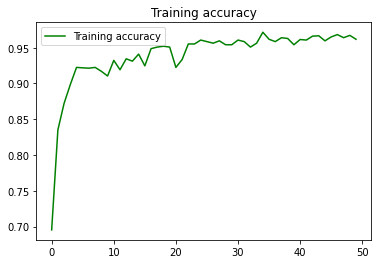

<Figure size 432x288 with 0 Axes>

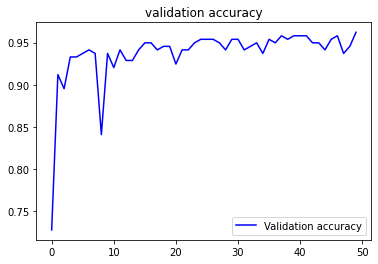

<Figure size 432x288 with 0 Axes>

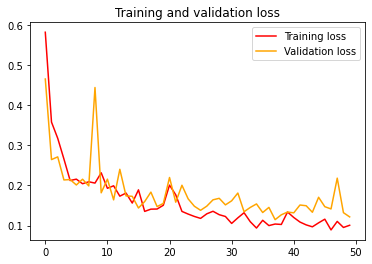

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# The training set is used to train the model
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# validation set is only used to evaluate the model's performance
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# the loss during training and validation process
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

Predicting any random image

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))
  

Creating customized InceptionV3 model

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Dataset 3/Train'

training_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.15, horizontal_flip=True, fill_mode='nearest')

VALIDATION_DIR = '/content/drive/MyDrive/Dataset 3/Test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size=(224,224), shuffle = True, class_mode='categorical',  batch_size = 128)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, target_size=(224,224), class_mode='categorical', shuffle = True, batch_size= 14)

Found 1801 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

In [ ]:
input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
# output layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
# model
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<0.1100 and logs.get('loss')<0.1100):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,steps_per_epoch = 14,epochs = 20,validation_data = validation_generator, validation_steps = 14)

Epoch 1/20
14/14 [==============================] - 162s 11s/step - loss: 0.0489 - acc: 0.9845 - val_loss: 0.1927 - val_acc: 0.9592
Epoch 2/20
14/14 [==============================] - 162s 11s/step - loss: 0.0371 - acc: 0.9898 - val_loss: 0.1622 - val_acc: 0.9592
Epoch 3/20
14/14 [==============================] - 171s 12s/step - loss: 0.0532 - acc: 0.9833 - val_loss: 0.1450 - val_acc: 0.9796
Epoch 4/20
14/14 [==============================] - 161s 11s/step - loss: 0.0279 - acc: 0.9940 - val_loss: 0.2086 - val_acc: 0.9745
Epoch 5/20
14/14 [==============================] - 161s 11s/step - loss: 0.0471 - acc: 0.9857 - val_loss: 1.0179 - val_acc: 0.7959
Epoch 6/20
14/14 [==============================] - 170s 12s/step - loss: 0.1538 - acc: 0.9721 - val_loss: 0.1499 - val_acc: 0.9694
Epoch 7/20
14/14 [==============================] - 175s 12s/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3332 - val_acc: 0.9592
Epoch 8/20
14/14 [==============================] - 161s 11s/step - loss: 0.

In [ ]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(train_generator, steps_per_epoch = 14, epochs = 10, validation_data = validation_generator, validation_steps = 14)
print(len(base_model.layers))

Epoch 1/10
14/14 [==============================] - 227s 16s/step - loss: 0.1037 - acc: 0.9548 - val_loss: 0.3014 - val_acc: 0.9388
Epoch 2/10
14/14 [==============================] - 212s 15s/step - loss: 0.0782 - acc: 0.9707 - val_loss: 0.2251 - val_acc: 0.9439
Epoch 3/10
14/14 [==============================] - 214s 15s/step - loss: 0.0662 - acc: 0.9743 - val_loss: 0.1787 - val_acc: 0.9592
Epoch 4/10
14/14 [==============================] - 210s 16s/step - loss: 0.0763 - acc: 0.9709 - val_loss: 0.1502 - val_acc: 0.9643
Epoch 5/10
14/14 [==============================] - 215s 15s/step - loss: 0.0778 - acc: 0.9680 - val_loss: 0.1401 - val_acc: 0.9592
Epoch 6/10
14/14 [==============================] - 217s 15s/step - loss: 0.0689 - acc: 0.9790 - val_loss: 0.1296 - val_acc: 0.9592
Epoch 7/10
14/14 [==============================] - 211s 15s/step - loss: 0.0628 - acc: 0.9793 - val_loss: 0.1265 - val_acc: 0.9592
Epoch 8/10
14/14 [==============================] - 217s 15s/step - loss: 0.

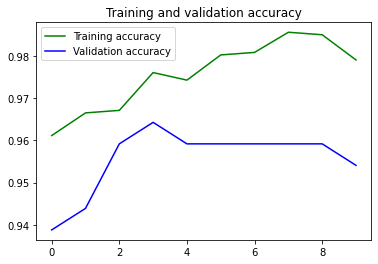

<Figure size 432x288 with 0 Axes>

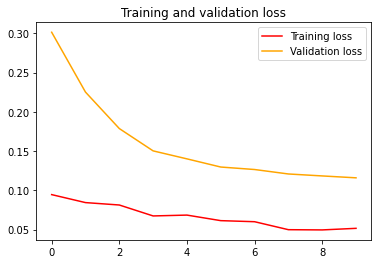

<Figure size 432x288 with 0 Axes>

In [ ]:


%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()
flag = 1

Predicting any random image

In [ ]:
flag = 1

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
def alert():
    mixer.init()
    alert = mixer.Sound('/content/WhatsApp Audio 2021-05-03 at 11.40.17 PM.mpeg')
    alert.play()
    time.sleep(0.1)
    alert.play()

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0])) 
  alert();

E mail 

In [ ]:
import smtplib
from email.mime.image import MIMEImage
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import datetime

In [ ]:
import ssl
print(ssl.OPENSSL_VERSION)

OpenSSL 1.1.1  11 Sep 2018


In [ ]:
if (flag ==1):
  port = 587  # For starttls
  smtp_server = "smtp.gmail.com"
  sender_email = input("Type sender email press enter:")
  receiver_email = input("Type receiver email press enter:")
  password = input("Type your password and press enter:")
  message = """\
  Subject: FIRE EMERCENCY 

  Fire emercency project email working configuration."""

  context = ssl.create_default_context()
  with smtplib.SMTP(smtp_server, port) as server:
      server.ehlo()  # Can be omitted
      server.starttls(context=context)
      server.ehlo()  # Can be omitted
      server.login(sender_email, password)
      server.sendmail(sender_email, receiver_email, message)
      print("Mail Sent")